In [15]:
import pandas as pd

# 1.) Clean the Apple Data to get a quarterly series of EPS.

In [16]:
data = pd.read_csv('/Users/adrianonggowarsito/Desktop/AAPL_quarterly_financials.csv', index_col=0, header=None).T 
y = data.reindex(index=data.index[::-1])
y.set_index('name', inplace=True)
y.drop(y.tail(1).index,inplace=True)
y.index = pd.to_datetime(y.index)
Y = y['BasicEPS']
Y = Y.fillna(0.)
Y

name
1985-09-30      0.0
1985-12-31    0.004
1986-03-31    0.002
1986-06-30    0.002
1986-09-30      0.0
              ...  
2022-09-30     1.29
2022-12-31     1.89
2023-03-31     1.53
2023-06-30     1.27
2023-09-30     1.47
Name: BasicEPS, Length: 153, dtype: object

# 1.) Come up with 6 search terms you think could nowcast earnings. (Different than the ones I used) Then, add in 3 terms that that you think will not Nowcast earnings. Pull in the gtrends data. Clean it to have a quarterly average.

In [17]:
from pytrends.request import TrendReq

In [18]:
import time

In [19]:
# Create pytrends object
pytrends = TrendReq(hl='en-US', tz=360)

# Set up the keywords and the timeframe
keywords = ['Phone', 'Sales', 'Macbook', 'Hack', 'OS', 'Tech', 'Food', 'Tokyo', 'Bali']  # Add your keywords here
start_date = '2004-01-01'
end_date = '2024-01-01'

# Create an empty DataFrame to store the results
df = pd.DataFrame()

# Iterate through keywords and fetch data
for keyword in keywords:
    time.sleep(5)
    pytrends.build_payload([keyword], cat=0, timeframe=f'{start_date} {end_date}', geo='', gprop='')
    interest_over_time_df = pytrends.interest_over_time()
    df[keyword] = interest_over_time_df[keyword]

In [20]:
dfq = df.resample('Q').mean()
dfq = dfq[dfq.index <= '2023-09-30']
dfq

,Phone,Sales,Macbook,Hack,OS,Tech,Food,Tokyo,Bali
date,,,,,,,,,
2004-03-31,80.333333,96.666667,0.000000,94.333333,67.333333,55.000000,65.666667,14.666667,34.000000
2004-06-30,80.333333,91.000000,0.000000,83.666667,69.000000,49.000000,59.333333,14.666667,37.333333
2004-09-30,85.666667,93.000000,0.000000,80.333333,61.333333,48.333333,54.333333,14.000000,44.000000
2004-12-31,82.666667,81.666667,0.000000,80.000000,65.000000,47.666667,61.000000,14.333333,35.000000
2005-03-31,80.333333,87.666667,0.000000,85.333333,62.000000,45.666667,62.000000,13.666667,37.000000
...,...,...,...,...,...,...,...,...,...
2022-09-30,91.000000,50.333333,83.000000,49.000000,80.333333,35.666667,97.333333,14.666667,76.000000
2022-12-31,81.000000,48.333333,77.333333,42.000000,72.666667,36.333333,90.666667,14.333333,71.666667
2023-03-31,76.333333,47.333333,76.000000,43.666667,65.000000,34.666667,88.666667,17.000000,80.666667


# 2.) Normalize all the X data

In [21]:
from sklearn.preprocessing import StandardScaler

In [22]:
scaler = StandardScaler()

In [23]:
X_scaled = scaler.fit_transform(dfq)

# 3.)  Import data. Train, Test, Holdout (80%,15%,5%) 

# 4.) Run a Lasso with lambda of .5. Plot a bar chart.

In [24]:
from sklearn.linear_model import Lasso

In [25]:
Y_04 = Y[Y.index >= '2004-03-31']

In [26]:
lasso = Lasso(alpha = .2) #lower lambda since its penalizing to much

In [27]:
lasso.fit(X_scaled, Y_04)

Lasso(alpha=0.2)

In [28]:
coefficients = lasso.coef_

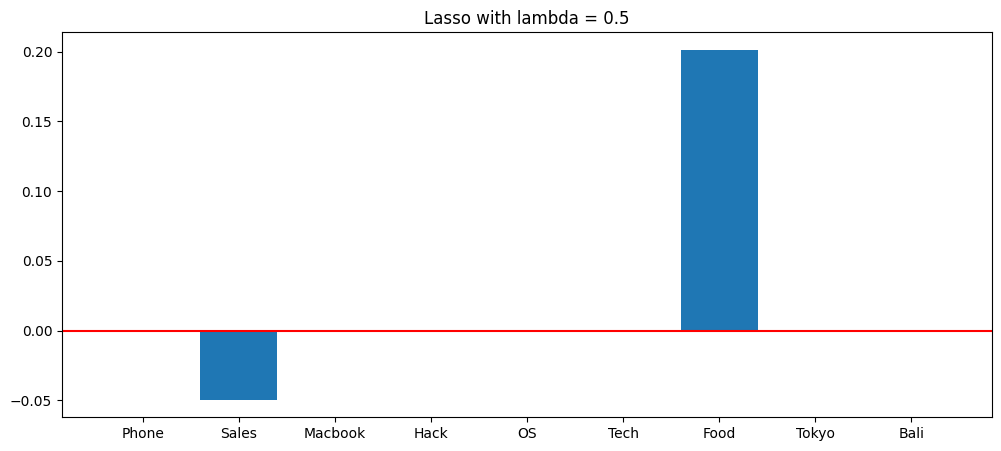

In [29]:
import matplotlib.pyplot as plt

names = ['Phone', 'Sales', 'Macbook', 'Hack', 'OS', 'Tech', 'Food', 'Tokyo', 'Bali']

plt.figure(figsize=(12,5))
plt.title('Lasso with lambda = 0.5')
plt.bar(range(len(coefficients)), coefficients, tick_label=names)
plt.axhline(0, color = 'red')
plt.show()

# 5.) Do these coefficient magnitudes make sense?

The coefficient does not really make sense. Much more relevant keywords like phone, macbook, os, and tech have 0 values, despite sales is affecting negatively, Food has pretty considerable outcome. Perhaps due to the amount of food bloggers using iPhones and/on social media

# 6.) Run a for loop looking at 10 different Lambdas and plot the coefficient magnitude for each.

/Users/adrianonggowarsito/anaconda3/lib/python3.10/site-packages/sklearn/base.py:1151: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
/Users/adrianonggowarsito/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:628: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/Users/adrianonggowarsito/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.945e+00, tolerance: 2.085e-03 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.li

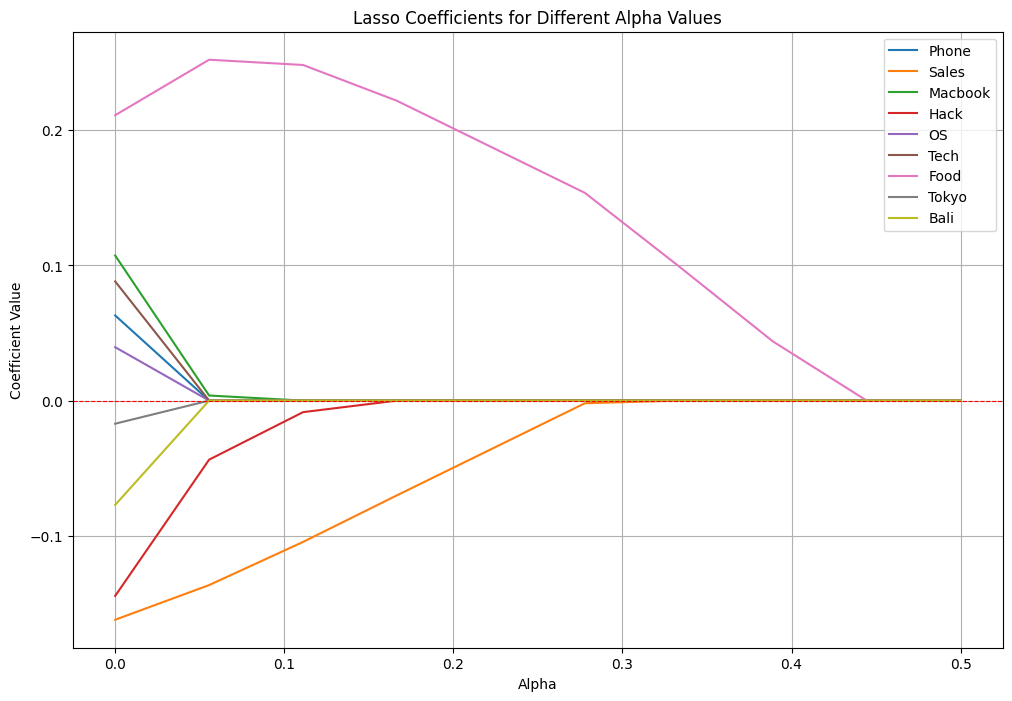

In [39]:
import numpy as np

alphas = np.linspace(0, 0.5, 10)

# List to store coefficients for each alpha
coefficients_list = []

# Loop through different alpha values
for alpha in alphas:
    lasso = Lasso(alpha=alpha)
    lasso.fit(X_scaled, Y_04)
    coefficients = lasso.coef_
    coefficients_list.append(coefficients)

# Transpose the coefficients list for easier plotting
coefficients_array = np.array(coefficients_list).T

# Plotting
plt.figure(figsize=(12, 8))
for i in range(len(names)):
    plt.plot(alphas, coefficients_array[i], label=names[i])

plt.xlabel('Alpha')
plt.ylabel('Coefficient Value')
plt.title('Lasso Coefficients for Different Alpha Values')
plt.axhline(0, color='red', linestyle='--', linewidth=0.8)
plt.legend()
plt.grid(True)
plt.show()

# 7.) Run a cross validation. What is your ideal lambda?

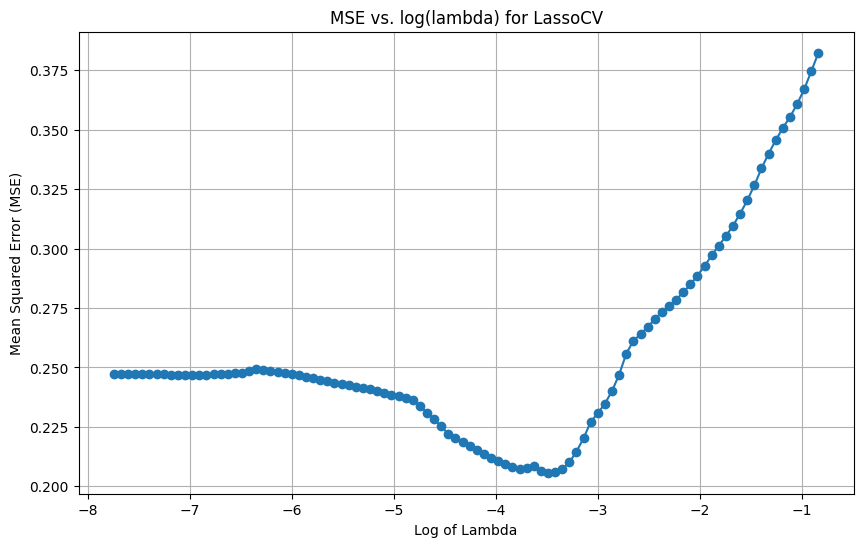

In [38]:
from sklearn.linear_model import LassoCV
modCV = LassoCV().fit(X_scaled,Y_04)

alphas = modCV.alphas_
mse_values = modCV.mse_path_.mean(axis=1)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(np.log(alphas), mse_values, marker='o')
plt.xlabel('Log of Lambda')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('MSE vs. log(lambda) for LassoCV')
plt.grid(True)
plt.show()

### Approximately between 3 and 4 (3.5)